In [1]:
import numpy as np
import tensorflow as tf
import math, os, sys, datetime
from pandas_datareader import data as pdr
from datetime import date, timedelta
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from ta import add_all_ta_features
from ta.utils import dropna
# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
tickers=['AAPL','AMZN','FB','GOOG','MMM','MSFT','NFLX','NKE','NVDA','INTC','CSCO','WMT','TSLA','EBAY',
        'ORCL','CBG.BK','OSP.BK','BBL.BK','SCB.BK','LH.BK','MINT.BK','PTT.BK','BANPU.BK','ADVANC.BK',
         'TRUE.BK','AOT.BK','BEM.BK','BTS.BK','CPALL.BK','CPN.BK']

startdate = datetime.datetime(2017, 1, 13)
enddate = datetime.datetime(2021, 1, 1)

In [2]:
all_data = pd.DataFrame()  
for stocks in tickers:
    ticker = yf.Ticker(stocks)
    data = ticker.history(start=startdate, end=enddate)
    data.insert(0, 'ticker', stocks)
    data['next_Close'] = data['Close'].shift(-7)
    data = data.drop(columns=['Dividends', 'Stock Splits'])
    data = dropna(data)
    data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
    data = data.drop(columns=['Volume', 'Open', 'High', 'Low'])

    all_data = all_data.append(data)
data = all_data

D:\Program Files\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
D:\Program Files\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [3]:
data.columns[2:]

Index(['next_Close', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi',
       'volume_mfi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi',
       'volume_vwap', 'volatility_atr', 'volatility_bbm', 'volatility_bbh',
       'volatility_bbl', 'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichi

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
X = data.iloc[:,2:] #independent columns
y = data['next_Close'] #target column i.e price range


In [5]:
# data[data.columns[7:]].corr()['pct_change'][:]
featureScores = pd.DataFrame(data[data.columns[2:]].corr()['next_Close'][:])
featureScores.sort_values(by=['next_Close'])

,next_Close
volume_obv,-0.214793
trend_vortex_ind_neg,-0.078270
trend_aroon_down,-0.052885
volatility_bbli,-0.031796
volatility_ui,-0.020670
volatility_kcli,-0.016816
volatility_kcw,-0.007926
trend_adx,-0.007517
trend_kst_diff,-0.005409
trend_dpo,-0.002084


In [6]:
x_list = []
for i in range(0, len(featureScores)):
    if abs(featureScores.next_Close[i]) > 0.90:
       x_list.append(featureScores.index[i])
X = data[x_list]
X = X.drop(columns=['next_Close'])

In [7]:
X

,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_kcc,volatility_kch,volatility_kcl,volatility_dcl,volatility_dch,volatility_dcm,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_psar_up,trend_psar_down,momentum_kama
Date,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-12,28.067142,0.000000,28.145027,28.145027,28.145027,28.067142,28.324401,27.809882,27.899569,28.156829,28.028199,28.145027,28.145027,28.145027,28.145027,28.028199,28.028199,28.028199,28.028199,55.684479,54.133594,-1.000000,-1.000000,28.145027
2017-01-13,28.094557,0.000000,28.120244,28.169810,28.070678,28.095069,28.319286,27.870852,27.899569,28.232351,28.065960,28.120244,28.120244,28.137402,28.141356,28.065960,28.065960,28.065960,28.065960,55.684479,54.133594,-1.000000,-1.000000,28.125489
2017-01-17,28.136342,0.000000,28.187510,28.382022,27.992997,28.130341,28.438737,27.821945,27.899569,28.378684,28.139127,28.187510,28.187510,28.165808,28.154740,28.139127,28.139127,28.139127,28.139127,55.684479,54.133594,-1.000000,28.156829,28.204487
2017-01-18,28.179238,0.000000,28.220551,28.424212,28.016891,28.182199,28.460109,27.904288,27.899569,28.440047,28.169808,28.220551,28.220551,28.189480,28.166957,28.169808,28.169808,28.169808,28.169808,55.684479,54.133594,27.901931,28.156829,28.250059
2017-01-19,28.194754,0.000000,28.230465,28.416890,28.044039,28.198209,28.454524,27.941895,27.899569,28.440047,28.169808,28.230465,28.230465,28.201886,28.174599,28.169808,28.169808,28.169808,28.169808,55.684479,54.133594,27.901931,28.156829,28.257900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15,53.943352,2.421256,53.445403,56.486906,50.403899,54.013183,56.383048,51.643317,48.137892,57.518609,52.828250,53.877409,51.555967,53.692128,51.292197,53.815693,47.520739,50.668216,46.656725,39.127465,41.842937,51.329133,55.328657,53.221917
2020-12-16,53.881080,2.351933,53.605862,56.413031,50.798694,53.980268,56.399505,51.561030,50.112778,57.518609,53.815693,53.897981,52.116151,53.749117,51.497409,53.939125,48.137892,51.038508,46.656725,39.312611,41.842937,51.576712,55.328657,53.228253
2020-12-17,53.937035,2.314229,53.679921,56.317870,51.041971,54.218900,56.539394,51.898407,50.112778,57.518609,53.815693,53.795122,52.647852,53.607445,51.595990,54.556278,49.248766,51.902522,46.656725,39.497757,41.842937,51.814388,55.328657,53.210325


In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
k_features=5,
forward=True,
floating=False,
scoring = 'r2',
cv = 0)
sfs.fit(X, y)
print(sfs.k_feature_names_)

('volume_vwap', 'volatility_bbm', 'volatility_kcc', 'volatility_dcl', 'trend_ema_fast')


In [9]:
sbs = SFS(LinearRegression(), 
k_features=5, 
forward=False, 
floating=False,
cv=0)
sbs.fit(X, y)
print(sbs.k_feature_names_)

('volatility_bbh', 'volatility_kch', 'volatility_dcl', 'volatility_dch', 'trend_ema_fast')


In [10]:
sfs1 = SFS(LinearRegression(),
k_features=(1,24),
forward=True,
floating=False,
cv=0)
sfs1.fit(X, y)
print(sfs1.k_feature_names_)

('volume_vwap', 'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_kcc', 'volatility_kch', 'volatility_dcl', 'volatility_dch', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_ichimoku_conv', 'trend_ichimoku_base', 'trend_ichimoku_b', 'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b', 'trend_psar_up', 'trend_psar_down', 'momentum_kama')


D:\Program Files\anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Program Files\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


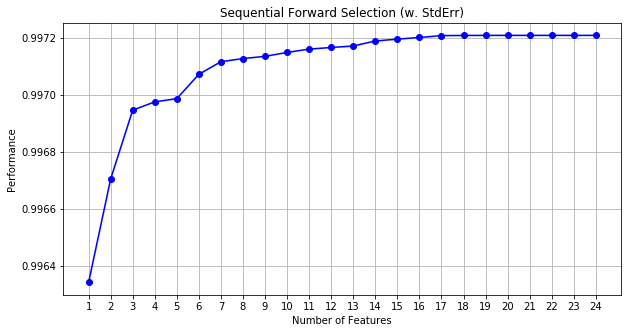

In [11]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev', figsize=(10,5))
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()